In [1]:
import pandas as pd
import numpy as np
import json
from itertools import chain

import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns

import time
import glob


params = {
   'axes.labelsize': 14,
   'font.size': 14,
   'legend.fontsize': 14,
   'xtick.labelsize': 14,
   'ytick.labelsize': 14,
   'text.usetex': False,
   'figure.figsize': [4.5, 4.5],
    'savefig.facecolor':'white'
   }

mpl.rcParams.update(params)


import random 
random.seed(12357)
np.random.seed(12357)


import pprint 
ppdict = pprint.PrettyPrinter(indent=4, sort_dicts=False)


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import umap
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score


timestr = time.strftime("%Y%m%d%H%M")
print(timestr)

202311041845


In [2]:
sol_saveat_dt = [1,1e-4][0]

print(sol_saveat_dt)

inpath = "output/"
outpath = "figures/supp1fig3/" 

1


In [3]:
##############################################
# set to True to save fig

savefigures = True #False #True 

##############################################

In [4]:
! ls -lh output | grep "_u\." | grep "sim_" | wc -l

190


In [5]:
print(len(glob.glob(inpath+"*_u.csv"))) 

190


In [6]:
input_file_ids = [i.rstrip("_u.csv") for i in glob.glob(inpath+"*_u.csv")]


input_file_ids = sorted(input_file_ids)

In [7]:
input_dfs = []

for fid in input_file_ids:

    dfn = fid + "_u.csv"
    tfn = fid + "_t.csv"
    nfn = fid + "_unames.csv"
    
    df = pd.read_csv(dfn,header=None)
    tf = pd.read_csv(tfn,header=None)
    nf = pd.read_csv(nfn,header=None)
    
    df.columns = [i[:-1] for i in nf[0].values.tolist() ]
    
    df['time_s'] = tf[0].copy()
    df['condition'] = fid.replace("output/sim_","").split("_extraTag",1)[0]
    
    input_dfs.append(df)
    
input_df = pd.concat(input_dfs, axis=0, ignore_index=True)

In [8]:
print(input_df.shape)

(58900, 185)


In [9]:
input_df = input_df.reindex(sorted(input_df.columns), axis=1)

In [10]:
input_df = input_df.loc[input_df['time_s']>180,:]
input_df = input_df.reset_index(drop=True)

In [11]:
input_df.head(3)

,ADP_a,ADP_i_a,ADP_i_n,ADP_mi_a,ADP_mi_n,ADP_mx_a,ADP_mx_n,ADP_n,ADPmito_a,ADPmito_n,...,f26bp_a,h,hIP3Ca_a,mGluRboundRatio_a,n,nBK_a,pgate,sTRP_a,time_s,vV
0,0.045,0.045969,0.057954,0.045225,0.056787,1.152120,1.131716,0.047784,1.759665,1.856772,...,0.012238,0.991528,0.653282,0.0,0.021990,0.000007,0.023936,0.001238,181.0,0.0237
1,0.045,0.045971,0.057954,0.045227,0.056787,1.152133,1.131715,0.047784,1.759688,1.856772,...,0.012238,0.991528,0.653285,0.0,0.021989,0.000007,0.023936,0.001238,182.0,0.0237
2,0.045,0.045973,0.057954,0.045230,0.056787,1.152145,1.131715,0.047784,1.759712,1.856771,...,0.012239,0.991528,0.653289,0.0,0.021989,0.000007,0.023936,0.001238,183.0,0.0237


In [12]:
all_cnds_l = sorted(input_df['condition'].unique())
len(all_cnds_l)

190

In [13]:
sel_cnds = ["121_default","g1_61_def","g1_40_glclacbhb_ini"]

In [14]:
sel_mets = sorted([i[0:-1] for i in [ "NADHmito_n0", "QH2mito_n0", "CytCredmito_n0",  
            "ATPmito_n0", "ATP_mx_n0", "ATP_i_n0", "ATP_mi_n0", 
             "ATP_n0", "FUMmito_n0", "MALmito_n0", "OXAmito_n0", "SUCmito_n0", "SUCCOAmito_n0", "CoAmito_n0", 
            "AKGmito_n0",  "ISOCITmito_n0", "CITmito_n0", "AcCoAmito_n0",  "PYRmito_n0",  
            "NADH_n0",   "NADHmito_a0", "QH2mito_a0", "CytCredmito_a0",  
            "ATPmito_a0",   "ATP_mx_a0",  "ATP_i_a0",   "ATP_mi_a0",  
             "ATP_a0",  "FUMmito_a0", "MALmito_a0", "OXAmito_a0", "SUCmito_a0", "SUCCOAmito_a0", "CoAmito_a0", 
            "AKGmito_a0", "ISOCITmito_a0", "CITmito_a0", "AcCoAmito_a0", "PYRmito_a0",  
             "Glc_b0", "Glc_t_t0", "Glc_ecsBA0", "Glc_a0", "Glc_ecsAN0", "Glc_n0", "G6P_n0", "G6P_a0", "F6P_n0", "F6P_a0", "FBP_n0", "FBP_a0", "f26bp_a0",   "G1P_a0", "GAP_n0", "GAP_a0", 
              "DHAP_n0", "DHAP_a0", "BPG13_n0", "BPG13_a0", "NADH_a0", "PG3_n0", "PG3_a0", "PG2_n0", "PG2_a0", "PEP_n0", "PEP_a0", "Pyr_n0", "Pyr_a0", "Lac_b0", "Lac_ecs0", "Lac_a0", "Lac_n0", 
              "NADPH_n0", "NADPH_a0"
]])

In [15]:
input_df_mp = input_df.loc[input_df['condition'].isin(sel_cnds),sel_mets + ['condition', 'time_s']].copy()  

In [16]:
input_df_mpl = pd.melt(input_df_mp,id_vars=['condition','time_s'])


In [17]:
input_df_mpl.head(3)

,condition,time_s,variable,value
0,121_default,181.0,AKGmito_a,0.014200
1,121_default,182.0,AKGmito_a,0.014198
2,121_default,183.0,AKGmito_a,0.014197


In [18]:
input_df_mpl['log_conc'] = np.log(input_df_mpl['value'])

In [19]:
lut_cnds = {'121_default':"#069e1d", 
                'g1_61_def':"#fa6f0c",
            'g1_40_glclacbhb_ini':"#0390fc"
               }


In [20]:
tmp = pd.DataFrame(input_df_mpl.loc[input_df_mpl['variable'].isin(sel_mets),['variable','value','condition']].groupby(['variable','condition']).apply(np.median))

tmp = tmp.sort_values(by=0)

In [21]:
tmp = tmp.reset_index(drop=False)

In [22]:
tmp.loc[tmp['variable']=='NADH_n']

,variable,condition,0
36,NADH_n,g1_61_def,0.004045
37,NADH_n,121_default,0.004140
59,NADH_n,g1_40_glclacbhb_ini,0.010156


In [24]:
range1 = [i for i in list(tmp.loc[tmp[0]<0.005,'variable'].unique()) if not i in ["NADH_n"]]
len(range1)

14

In [25]:
range2 = [i for i in tmp.loc[(tmp[0]>=0.005) & (tmp[0]<0.025),'variable'].unique() if not i in range1+["AKGmito_a","FBP_a"]]+["NADH_n"]
len(range2)

15

In [26]:
range3 = [i for i in tmp.loc[(tmp[0]>=0.025) & (tmp[0]<0.1),'variable'].unique() if not i in range1+range2+["AKGmito_a","FBP_a"]] 
len(range3)

13

In [27]:
range4 = [i for i in tmp.loc[(tmp[0]>=0.1) & (tmp[0]<0.5),'variable'].unique() if not i in range1+range2+range3]+ ["AKGmito_a","FBP_a"] #if not i in ['Glc_n', 'Glc_ecsAN','Glc_a', 'Glc_ecsBA','Glc_t_t']
len(range4)

16

In [28]:
range5 = [i for i in tmp.loc[(tmp[0]>=0.5) & (tmp[0]<2),'variable'].unique() if not i in range1+range2+range3+range4]
len(range5)

17

In [29]:
range6 = list(tmp.loc[(tmp[0]>=2) ,'variable'].unique()) 
len(range6)

1

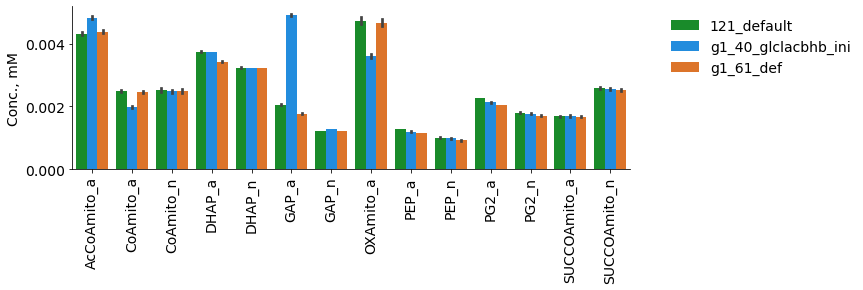

In [30]:
fig = plt.figure(figsize=(10,3))
ax = plt.subplot(111)

sns.barplot(ax=ax,
            data=input_df_mpl.loc[input_df_mpl['variable'].isin(range1)], 
            y='value', x='variable', 
            hue="condition",palette=lut_cnds,orient='v',ci=95)

ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)

ax.set_xlabel("")
ax.set_ylabel("Conc., mM")
ax.tick_params( axis='x', rotation=90 )

ax.legend( bbox_to_anchor=(1.05, 1), loc='upper left',frameon=False)

plt.show()

if savefigures == True:
    
    spec_id = "bars_mets1_"
    
    fig.savefig(outpath +  spec_id +  timestr + ".pdf",transparent=False, bbox_inches="tight")
    fig.savefig(outpath +  spec_id +  timestr + ".png",dpi=300,transparent=False, bbox_inches="tight")


In [ ]:
pd.set_option('display.max_rows', 500)

In [ ]:
pd.DataFrame(input_df_mpl.loc[input_df_mpl['variable'].isin(range1),['variable','condition','value']].groupby(['variable','condition'])['value'].mean())

In [ ]:
pd.DataFrame(input_df_mpl.loc[input_df_mpl['variable'].isin(range1),['variable','condition','value']].groupby(['variable','condition'])['value'].std())

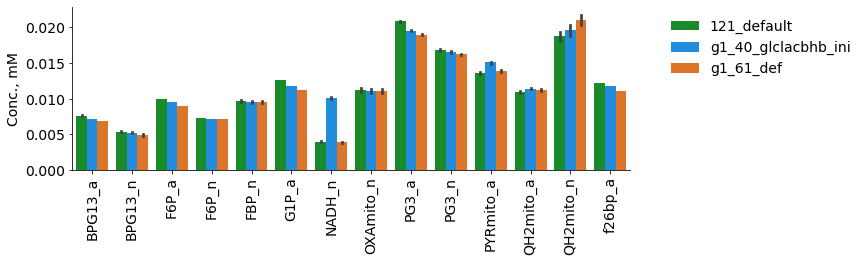

In [31]:
fig = plt.figure(figsize=(10,3))
ax = plt.subplot(111)

sns.barplot(ax=ax,
            data=input_df_mpl.loc[input_df_mpl['variable'].isin(range2)], 
            y='value', x='variable', 
            hue="condition",palette=lut_cnds,orient='v',ci=95)

ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)

ax.set_xlabel("")
ax.set_ylabel("Conc., mM")
ax.tick_params( axis='x', rotation=90 )

ax.legend( bbox_to_anchor=(1.05, 1), loc='upper left',frameon=False)

plt.show()

if savefigures == True:
    
    spec_id = "bars_mets2_"
    
    fig.savefig(outpath +  spec_id +  timestr + ".pdf",transparent=False, bbox_inches="tight")
    fig.savefig(outpath +  spec_id +  timestr + ".png",dpi=300,transparent=False, bbox_inches="tight")


In [ ]:
pd.DataFrame(input_df_mpl.loc[input_df_mpl['variable'].isin(range2),['variable','condition','value']].groupby(['variable','condition'])['value'].mean())

In [ ]:
pd.DataFrame(input_df_mpl.loc[input_df_mpl['variable'].isin(range2),['variable','condition','value']].groupby(['variable','condition'])['value'].std())

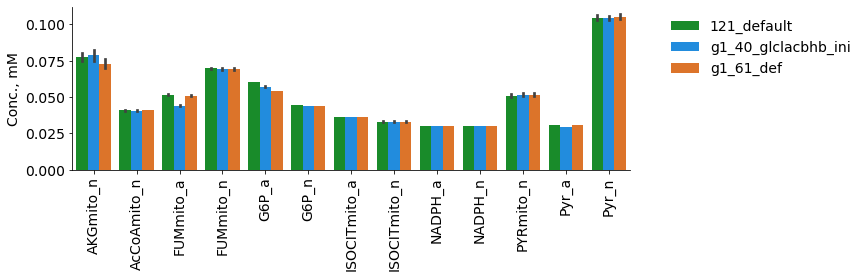

In [32]:
fig = plt.figure(figsize=(10,3))
ax = plt.subplot(111)

sns.barplot(ax=ax,
            data=input_df_mpl.loc[input_df_mpl['variable'].isin(range3)], 
            y='value', x='variable', 
            hue="condition",palette=lut_cnds,orient='v',ci=95)

ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)

ax.set_xlabel("")
ax.set_ylabel("Conc., mM")
ax.tick_params( axis='x', rotation=90 )
ax.legend( bbox_to_anchor=(1.05, 1), loc='upper left',frameon=False)

plt.show()

if savefigures == True:
    
    spec_id = "bars_mets3_"
    
    fig.savefig(outpath +  spec_id +  timestr + ".pdf",transparent=False, bbox_inches="tight")
    fig.savefig(outpath +  spec_id +  timestr + ".png",dpi=300,transparent=False, bbox_inches="tight")


In [ ]:
pd.DataFrame(input_df_mpl.loc[input_df_mpl['variable'].isin(range3),['variable','condition','value']].groupby(['variable','condition'])['value'].mean())

In [ ]:
pd.DataFrame(input_df_mpl.loc[input_df_mpl['variable'].isin(range3),['variable','condition','value']].groupby(['variable','condition'])['value'].std())

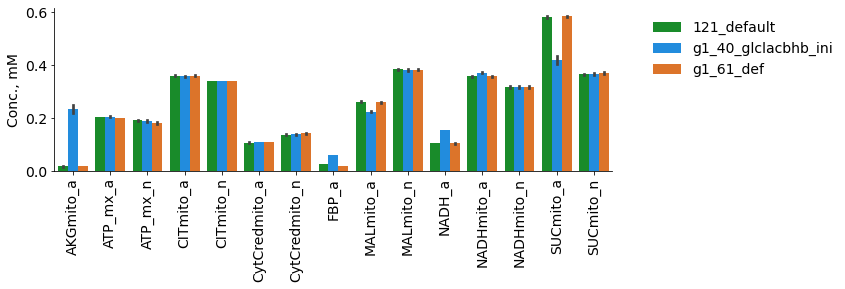

In [33]:
fig = plt.figure(figsize=(10,3))
ax = plt.subplot(111)

sns.barplot(ax=ax,
            data=input_df_mpl.loc[input_df_mpl['variable'].isin(range4)], 
            y='value', x='variable', 
            hue="condition",palette=lut_cnds,orient='v',ci=95)

ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)

ax.set_xlabel("")
ax.set_ylabel("Conc., mM")
ax.tick_params( axis='x', rotation=90 )
ax.legend( bbox_to_anchor=(1.05, 1), loc='upper left',frameon=False)

plt.show()

if savefigures == True:
    
    spec_id = "bars_mets4_"
    
    fig.savefig(outpath +  spec_id +  timestr + ".pdf",transparent=False, bbox_inches="tight")
    fig.savefig(outpath +  spec_id +  timestr + ".png",dpi=300,transparent=False, bbox_inches="tight")


In [ ]:
pd.DataFrame(input_df_mpl.loc[input_df_mpl['variable'].isin(range4),['variable','condition','value']].groupby(['variable','condition'])['value'].mean())

In [ ]:
pd.DataFrame(input_df_mpl.loc[input_df_mpl['variable'].isin(range4),['variable','condition','value']].groupby(['variable','condition'])['value'].std())

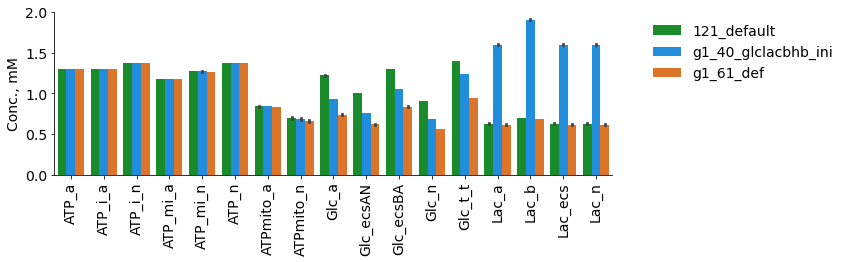

In [34]:
fig = plt.figure(figsize=(10,3))
ax = plt.subplot(111)

sns.barplot(ax=ax,
            data=input_df_mpl.loc[input_df_mpl['variable'].isin(range5)], 
            y='value', x='variable', 
            hue="condition",palette=lut_cnds,orient='v',ci=95)

ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)

ax.set_xlabel("")
ax.set_ylabel("Conc., mM")
ax.tick_params( axis='x', rotation=90 )
ax.legend( bbox_to_anchor=(1.05, 1), loc='upper left',frameon=False)

plt.show()

if savefigures == True:
    
    spec_id = "bars_mets5_"
    
    fig.savefig(outpath +  spec_id +  timestr + ".pdf",transparent=False, bbox_inches="tight")
    fig.savefig(outpath +  spec_id +  timestr + ".png",dpi=300,transparent=False, bbox_inches="tight")


In [ ]:
pd.DataFrame(input_df_mpl.loc[input_df_mpl['variable'].isin(range5),['variable','condition','value']].groupby(['variable','condition'])['value'].mean())

In [ ]:
pd.DataFrame(input_df_mpl.loc[input_df_mpl['variable'].isin(range5),['variable','condition','value']].groupby(['variable','condition'])['value'].std())

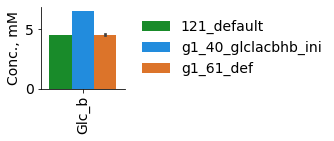

In [35]:
fig = plt.figure(figsize=(1.5,1.5))
ax = plt.subplot(111)

sns.barplot(ax=ax,
            data=input_df_mpl.loc[input_df_mpl['variable'].isin(range6)], 
            y='value', x='variable', 
            hue="condition",palette=lut_cnds,orient='v',ci=95)

ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)

ax.set_xlabel("")
ax.set_ylabel("Conc., mM")
ax.tick_params( axis='x', rotation=90 )
ax.legend( bbox_to_anchor=(1.05, 1), loc='upper left',frameon=False)

plt.show()

if savefigures == True:
    
    spec_id = "bars_mets6_"
    
    fig.savefig(outpath +  spec_id +  timestr + ".pdf",transparent=False, bbox_inches="tight")
    fig.savefig(outpath +  spec_id +  timestr + ".png",dpi=300,transparent=False, bbox_inches="tight")


In [ ]:
pd.DataFrame(input_df_mpl.loc[input_df_mpl['variable'].isin(range6),['variable','condition','value']].groupby(['variable','condition'])['value'].mean())

In [ ]:
pd.DataFrame(input_df_mpl.loc[input_df_mpl['variable'].isin(range6),['variable','condition','value']].groupby(['variable','condition'])['value'].std())